# Base para inferências e separação de conjunto de treinamento e de testes
Utilizaremos Python com pandas para esta atividade.
Link para banco de dados: https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv

TAREFAS:

[x]1 - Usar pandas para ler arquivo

[x]2 - Renomear colunas do banco de dados para português

[x]3 - Separar banco de dados em duas partes - entradas e resultados

[x]4 - Separar cada parte em duas, uma com dados para treinamento e outra com dados para testes e validações

5 - Treinar usando sklearn com aproximação linear dos dados

6 - Verificar precisão da rede treinada

In [0]:
import pandas as pd

url = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv";

dados = pd.read_csv(url);

dados.head()



,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [0]:
mapa = {
    "home" : "principal",
    "how_it_works" : "como_funciona",
    "contact" : "contato",
    "bought" : "comprou"
}
dados = dados.rename(columns = mapa);

In [0]:
x = dados [["principal","como_funciona","contato"]]
x.head()


,principal,como_funciona,contato
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [0]:
y = dados ["comprou"]
y.head()


0    0
1    0
2    0
3    0
4    0
Name: comprou, dtype: int64

In [0]:
dados.shape

(99, 4)

In [0]:
treino_x = x[:75]
treino_y = y[:75]
teste_x = x[75:]
teste_y = y[75:]

In [0]:
teste_y.shape

(24,)

In [0]:
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 75 elementos e testaremos com 24 elementos


In [0]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC()
modelo.fit(treino_x, treino_y) 



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
previsoes = modelo.predict(teste_x)

In [0]:
taxa_de_acerto = accuracy_score(teste_y, previsoes)*100

In [0]:
print("A taxa de acertos para esta previsão é de %.2f%%"  % taxa_de_acerto)

A taxa de acertos para esta previsão é de 95.83%


#Como fazer divisão automática dos dados de forma randômica para melhor precisão do treinamento:

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 25

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))



modelo = LinearSVC()
modelo.fit(treino_x, treino_y) 

previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)*100

print("A taxa de acertos para esta previsão é de %.2f%%"  % taxa_de_acerto)

Treinaremos com 74 elementos e testaremos com 25 elementos
A taxa de acertos para esta previsão é de 92.00%


In [0]:
previsoes

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0])

In [0]:
teste_y

54    1
29    0
33    1
64    1
72    0
6     0
84    1
88    0
68    1
59    0
0     0
65    1
42    0
52    1
46    1
96    0
58    1
66    0
56    1
80    0
79    1
25    1
97    0
13    0
94    0
Name: comprou, dtype: int64

In [0]:
teste_x

,principal,como_funciona,contato
54,1,0,1
29,0,0,1
33,1,0,1
64,1,0,1
72,0,0,1
6,1,1,0
84,1,0,1
88,0,0,1
68,1,0,1
59,0,0,1


In [0]:
print(treino_x.shape)
print(teste_x.shape)

(74, 3)
(25, 3)


# Como melhorar a precisão?

In [0]:
dados.comprou.value_counts()

0    66
1    33
Name: comprou, dtype: int64

In [0]:
treino_y.value_counts()


0    53
1    21
Name: comprou, dtype: int64

In [0]:
teste_y.value_counts()

0    13
1    12
Name: comprou, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 22

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))



modelo = LinearSVC()
modelo.fit(treino_x, treino_y) 

previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)*100

print("A taxa de acertos para esta previsão é de %.2f%%"  % taxa_de_acerto)

Treinaremos com 74 elementos e testaremos com 25 elementos
A taxa de acertos para esta previsão é de 96.00%


In [0]:
treino_y.value_counts()


0    49
1    25
Name: comprou, dtype: int64

In [0]:
teste_y.value_counts()

0    17
1     8
Name: comprou, dtype: int64

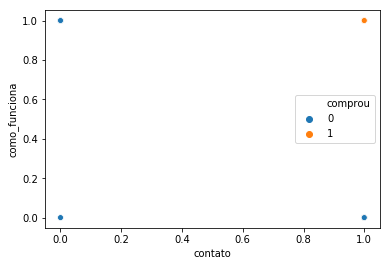

In [0]:
import seaborn as sns
sns.scatterplot(x="contato", y="como_funciona", hue=treino_y, data=treino_x)

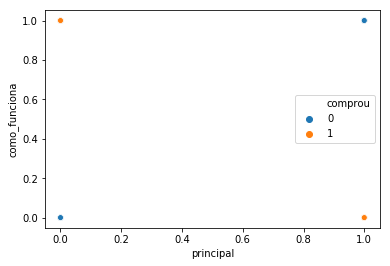

In [0]:
sns.scatterplot(x="principal", y="como_funciona", hue=treino_y, data=treino_x)

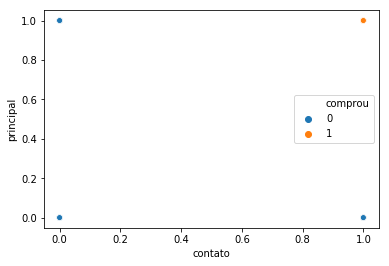

In [0]:
sns.scatterplot(x="contato", y="principal", hue=treino_y, data=treino_x)

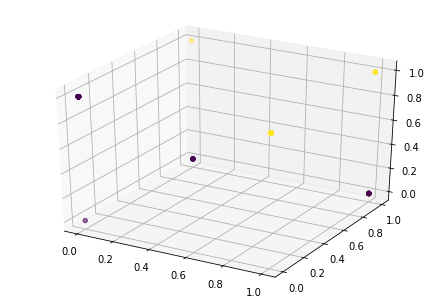

In [0]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = treino_x["principal"]
sequence_containing_y_vals = treino_x["como_funciona"]
sequence_containing_z_vals = treino_x["contato"]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, c=treino_y)
pyplot.show()